# Compare model output with ASTE and observations

Load selected mooring time series and plot CANARI LE, ASTE and obs (see choose_ASTE_profiles and subset_CANARI_LE)

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import utils

In [2]:
%matplotlib inline

Load ASTE data

In [3]:
import glob
mooring_files=glob.glob('../data/*tseries.nc')
mooring_vars={}
for file in mooring_files:
    mooring=xr.open_dataset(file)
    if 'iPROF' in mooring.dims:
        mooring=mooring.swap_dims({'iPROF':'time'})
    mooring=mooring.sortby('time').squeeze()
    if 'point' in mooring.dims:
        for ip,point in enumerate(mooring.point):
            mooring_vars[f'{mooring["loc"].values}_{ip}']=mooring[['prof_T','prof_Testim','prof_S','prof_Sestim']].sel(point=point)
    else:
        mooring_vars[str(mooring['loc'].values)]=mooring[['prof_T','prof_Testim','prof_S','prof_Sestim']]

Load CANARI LE data

In [4]:
Tdata_allm=xr.open_mfdataset(f'../data/mooring_tseries_ens*nc',concat_dim='ens',combine='nested')
Tdata_allm=Tdata_allm.assign_coords({'loc':['Beaufort Mooring', 'Bering Mooring', 'Davis Mooring', 'Fram Mooring',
       'OSNAP Mooring_0', 'OSNAP Mooring_1']})

Load CMIP6 data

In [5]:
#models=['HadGEM3-GC31-MM','GFDL-ESM4','IPSL-CM6A-LR','MPI-ESM1-2-HR', 'MRI-ESM2-0']
models=['HadGEM3-GC31-MM','GFDL-ESM4','IPSL-CM6A-LR',]
Cdata_allm=[]
for model in models:
    Cdata_allm_T=xr.open_mfdataset(f'../data/mooring_tseries_{model}*thetao.nc',concat_dim=['run'],combine='nested')
    Cdata_allm_S=xr.open_mfdataset(f'../data/mooring_tseries_{model}*so.nc',concat_dim=['run'],combine='nested')
    Cdata_allm.append(xr.merge([Cdata_allm_T['thetao'],Cdata_allm_S['so']]))
Cdata_allm=xr.concat(Cdata_allm,'model'
                #     ,compat='override',coords='minimal'
                    )
Cdata_allm=Cdata_allm.assign_coords({'loc':['Beaufort Mooring', 'Bering Mooring', 'Davis Mooring', 'Fram Mooring',
       'OSNAP Mooring_0', 'OSNAP Mooring_1']})
Cdata_allm

<xarray.Dataset>
Dimensions:     (time: 304, run: 13, model: 3, loc: 6)
Coordinates:
  * time        (time) datetime64[ns] 2000-01-16 ... 2014-12-16T12:00:00
  * run         (run) <U8 'r1i1p1f1' 'r1i1p1f3' ... 'r8i1p1f1' 'r9i1p1f1'
    y           (model, loc) float64 dask.array<chunksize=(1, 6), meta=np.ndarray>
    x           (model, loc) float64 dask.array<chunksize=(1, 6), meta=np.ndarray>
    lat         (model, loc) float32 dask.array<chunksize=(1, 6), meta=np.ndarray>
    lon         (model, loc) float32 dask.array<chunksize=(1, 6), meta=np.ndarray>
    lev         (loc) float64 573.0 45.0 265.7 87.59 983.3 597.7
    prof_point  (loc) float64 1.134e+06 8.344e+05 ... 7.538e+05 7.992e+05
    depth       (loc) float64 573.0 45.0 265.7 87.59 983.3 597.7
    point       (loc) float64 1.134e+06 8.344e+05 ... 7.538e+05 7.992e+05
  * model       (model) <U15 'HadGEM3-GC31-MM' 'GFDL-ESM4' 'IPSL-CM6A-LR'
  * loc         (loc) <U16 'Beaufort Mooring' ... 'OSNAP Mooring_1'
Data variables:
    thetao      (model, run, loc, time) float32 dask.array<chunksize=(1, 2, 6, 304), meta=np.ndarray>
    so          (model, run, loc, time) float32 dask.array<chunksize=(1, 2, 6, 304), meta=np.ndarray>
Attributes:
    long_name:      Sea Water Potential Temperature
    original_name:  mo: (variable_name: thetao)
    standard_name:  sea_water_potential_temperature
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        mo: This variable is reported using a z* coordinate syste...
    units:          °C

In [10]:
Cdata_allm.lon[:,0].load()

<xarray.DataArray 'lon' (model: 3)>
array([220.07236, 219.93591, 220.33586], dtype=float32)
Coordinates:
    y           (model) float64 1.113e+03 81.87 308.0
    x           (model) float64 501.0 -152.2 126.0
    lat         (model) float32 73.98 74.08 73.88
    lon         (model) float32 220.1 219.9 220.3
    lev         float64 573.0
    prof_point  float64 1.134e+06
    depth       float64 573.0
    point       float64 1.134e+06
  * model       (model) <U15 'HadGEM3-GC31-MM' 'GFDL-ESM4' 'IPSL-CM6A-LR'
    loc         <U16 'Beaufort Mooring'
Attributes:
    standard_name:  longitude
    long_name:      longitude
    bounds:         vertices_longitude
    units:          degrees_east

In [7]:
mooring_vars['Beaufort Mooring'].prof_lon.dropna('time')

<xarray.DataArray 'prof_lon' (time: 3007)>
array([-139.9821  , -139.9821  , -139.9821  , ..., -140.071073, -140.071073,
       -140.071073])
Coordinates: (12/21)
    prof_descr           (time) |S30 ...
    prof_date            (time) float64 ...
    prof_YYYYMMDD        (time) float64 ...
    prof_HHMMSS          (time) float64 ...
    prof_lon             (time) float64 -140.0 -140.0 -140.0 ... -140.1 -140.1
    prof_lat             (time) float64 ...
    ...                   ...
    prof_interp_lat      (time) float64 ...
    prof_interp_weights  (time) float64 ...
  * time                 (time) datetime64[ns] 2005-08-30 ... 2016-10-11
    depth                float64 ...
    loc                  <U16 'Beaufort Mooring'
    point                float64 1.134e+06
Attributes:
    long_name:  Longitude (degree East)
    units:      degrees_east

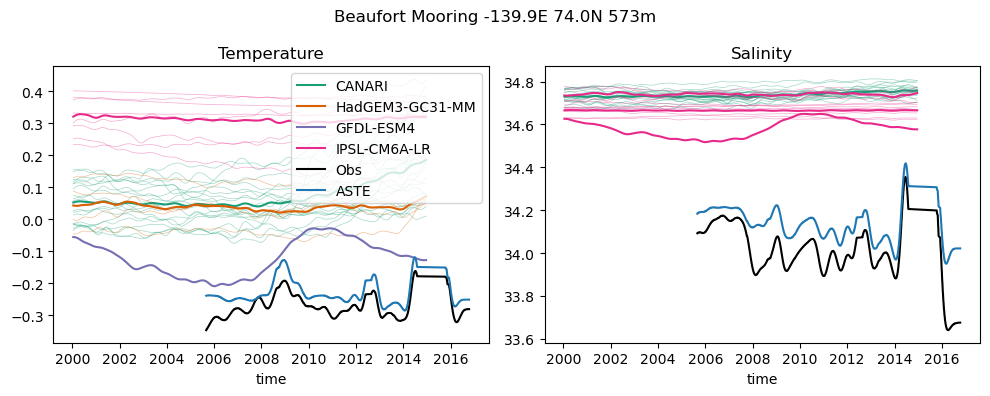

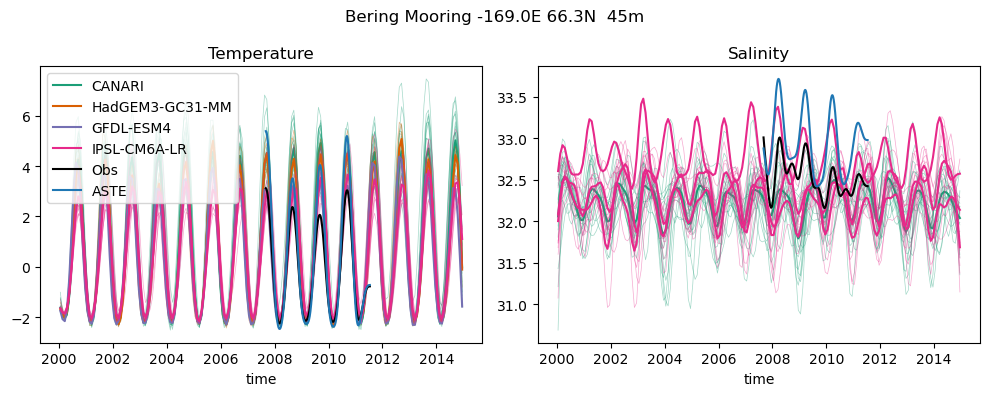

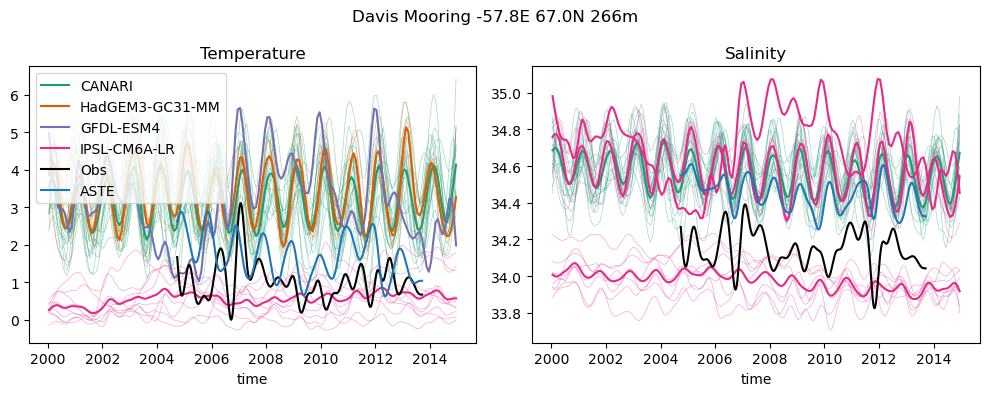

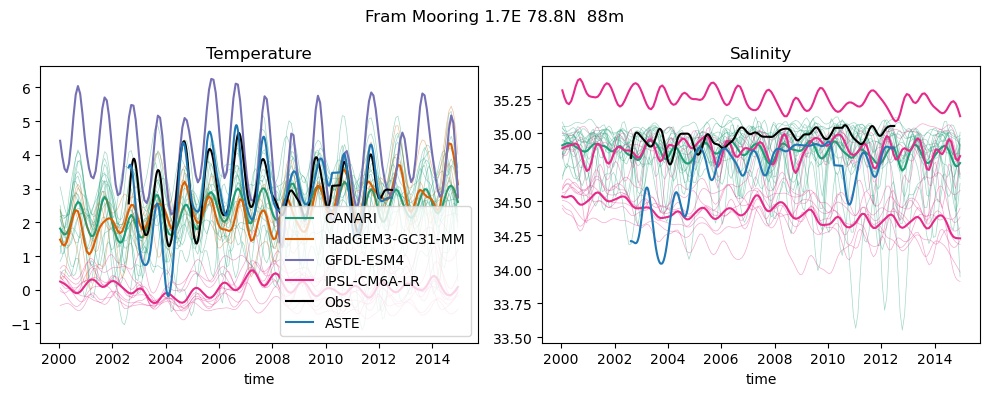

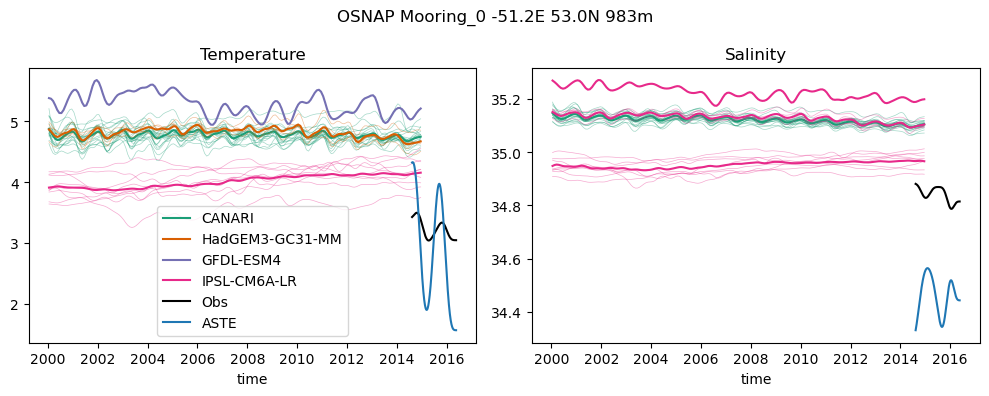

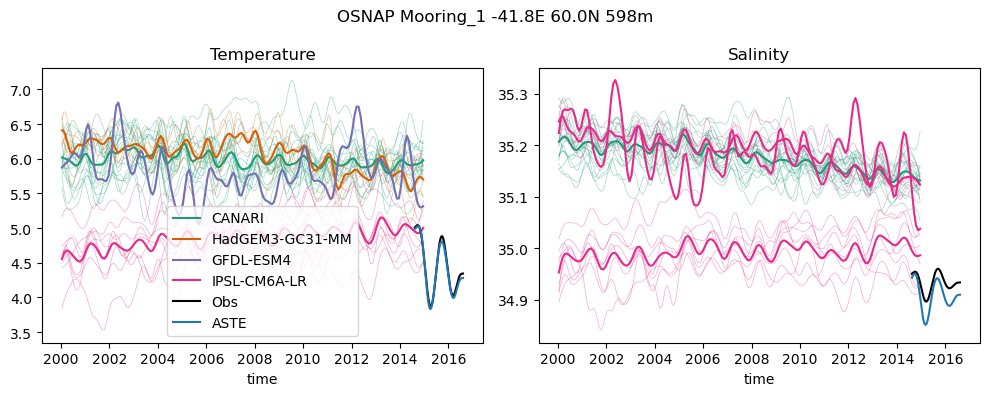

In [11]:
cmap=plt.get_cmap('Dark2')
for loc in mooring_vars:
    plt.figure(figsize=[10,4])
    plt.subplot(1,2,1)
    Tdata_plot=Tdata_allm.sel(loc=loc)
    Cdata_plot=Cdata_allm['thetao'].sel(loc=loc)
    utils.butter_ufunc(Tdata_plot.votemper.dropna('time_counter').load(),6,'time_counter').plot(x='time_counter',hue='ens',color=cmap(0),linewidth=0.5,add_legend=False,alpha=0.4)
    pp1=utils.butter_ufunc(Tdata_plot.votemper.dropna('time_counter').mean('ens').load(),6,'time_counter').plot(x='time_counter',color=cmap(0),add_legend=False)
  #  utils.butter_ufunc(Cdata_plot.thetao.dropna('time').load(),6,'time').plot(x='time',hue='run',color='r',linewidth=0.5,add_legend=False,alpha=0.4)
    pp2=[]
    for im,model in enumerate(models):
        if Cdata_plot.sel(model=model).dropna('run',how='all').run.size>1:
            utils.butter_ufunc(Cdata_plot.sel(model=model).dropna('time',how='all').load(),6,'time').plot(x='time',hue='run',color=cmap(im+1),add_legend=False,linewidth=0.5,alpha=0.4)
        pp2.append(utils.butter_ufunc(Cdata_plot.sel(model=model).mean('run').dropna('time').load(),6,'time').plot(x='time',color=cmap(im+1),add_legend=False)[0])
    pp3=utils.butter_ufunc(mooring_vars[loc].prof_T.dropna('time'),365.25/2,'time').plot(x='time',color='k')
    pp4=utils.butter_ufunc(mooring_vars[loc].prof_Testim.dropna('time'),365.25/2,'time').plot(x='time')
    plt.legend([pp1[0],]+pp2+[pp3[0],pp4[0]],['CANARI',]+models+['Obs','ASTE'])
    plt.title('Temperature')
    plt.ylabel('')
    plt.subplot(1,2,2)
    Cdata_plot=Cdata_allm['so'].sel(loc=loc)
    utils.butter_ufunc(Tdata_plot.vosaline.dropna('time_counter').load(),6,'time_counter').plot(x='time_counter',hue='ens',color=cmap(0),linewidth=0.5,add_legend=False,alpha=0.4)
    utils.butter_ufunc(Tdata_plot.vosaline.dropna('time_counter').mean('ens').load(),6,'time_counter').plot(x='time_counter',hue='ens',color=cmap(0),add_legend=False)
 #   utils.butter_ufunc(Cdata_plot.so.dropna('time_counter').load(),6,'time').plot(x='time',hue='run',color='r',linewidth=0.5,add_legend=False,alpha=0.4)
    for model in models:       
        if Cdata_plot.sel(model=model).dropna('run',how='all').run.size>1:
            utils.butter_ufunc(Cdata_plot.sel(model=model).dropna('time',how='all').load(),6,'time').plot(x='time',hue='run',color=cmap(im+1),add_legend=False,linewidth=0.5,alpha=0.4)
        utils.butter_ufunc(Cdata_plot.sel(model=model).mean('run').dropna('time').load(),6,'time').plot(x='time',color=cmap(im+1),add_legend=False)
    utils.butter_ufunc(mooring_vars[loc].prof_S.dropna('time'),365.25/2,'time').plot(x='time',color='k')
    utils.butter_ufunc(mooring_vars[loc].prof_Sestim.dropna('time'),365.25/2,'time').plot(x='time')
    plt.title('Salinity')
    plt.ylabel('')
    plt.suptitle(f'{loc} {Tdata_plot.nav_lon.data:2.1f}E {Tdata_plot.nav_lat.data:2.1f}N {Tdata_plot.deptht.data:3.0f}m')
    plt.tight_layout()
  #  plt.savefig(f'../plots/{loc}_mooring_tseries.png',bbox_inches='tight')